In [1]:
%reset -sf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Input parsing

In [2]:
case_a = "a_an_example.in.txt"
case_b = "b_basic.in.txt"
case_c = "c_coarse.in.txt"
case_d = "d_difficult.in.txt"
case_e = "e_elaborate.in.txt"

folder_in = "input_data/"
folder_out = "output/"

In [3]:
cases = [case_a, case_b, case_c, case_d, case_e]

In [55]:
case = case_a
case = case_b
case = case_c
case = case_d
# case = case_e

In [56]:
with open(folder_in + case) as f:
    srr = [row.strip() for row in f.readlines()]
    
    arr = [set(x.split()[1:]) for x in srr[1::2]]
    brr = [set(x.split()[1:]) for x in srr[2::2]]
    

In [57]:
aset = set().union(*arr)
bset = set().union(*brr)
allset = aset | bset


In [58]:
always_include = aset - bset
always_exclude = bset - aset
to_decide = allset - always_include - always_exclude

In [59]:
xrr = [x & to_decide for x in arr]
yrr = [x & to_decide for x in brr]

# Data analysis

In [60]:
from collections import Counter
in_counter = Counter()
out_counter = Counter()

for x,y in zip(xrr, yrr):
    in_counter += Counter(x)
    out_counter += Counter(y)

In [61]:
xcount = []
ycount = []
for x in to_decide:
    xcount.append(in_counter[x])
    ycount.append(out_counter[x])

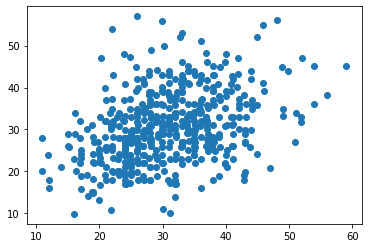

In [64]:
# each datapoint is an ingredient
# x is how many times it is included by a customer
# y is how many times it is excluded by a customer
length = len(xcount)
plt.scatter(np.array(xcount) + np.random.randn(length)/10, 
            np.array(ycount) + np.random.randn(length)/10)
plt.show()

# Upper bound analysis

In [54]:
print(len(xrr))

4986


# Scoring

In [65]:
def scoring(crr):
    crr = set(crr)
    res = 0
    for a,b in zip(arr,brr):
        
        all_included = set(a) & crr == set(a)
        all_excluded = set(b) & crr == set()

        if all_included and all_excluded:
            res += 1
    return res

scoring(list(always_include))

'0000001420'

In [50]:
res = list(always_include)

# Submission

In [71]:
import shutil

def save_file(res):
    shutil.copy("notebook_adhoc.ipynb", folder_out)
    score = str(scoring(res)).zfill(10)
    with open(folder_out + case + score, "w") as f:
        f.write(str(len(res)) + " " + " ".join(res))
        
save_file(res)

# 1-opt

Idea - force to serve a customer

In [99]:
!ls output

d_difficult.in.txt0000001786 d_difficult.in.txt0000001791
d_difficult.in.txt0000001790 notebook_adhoc.ipynb


In [ ]:
# initialisation
# crr = always_include

In [101]:
# loads an input

score = '0000001786'
filename = case + score
with open(folder_out + case + score) as f:
    crr = f.read().split()[1:]

In [91]:
prev_points, pts = 0, 0
crr = set(crr)

while True:
    idx = np.random.randint(0,len(xrr)-1)
    
    if xrr[idx] & crr == xrr[idx] and not yrr[idx] & crr:
        continue
    new_crr = (crr | xrr[idx]) - yrr[idx]
    
    pts = scoring(new_crr)
    if pts > prev_points:
        crr = new_crr
        prev_points = pts
        print(pts)

1787
1789
1790


KeyboardInterrupt: 

In [92]:
res = crr
save_file(res)

# 2-opt
Force to serve two customers

In [102]:
crr = set(crr)
prev_points, pts = scoring(crr), 0
# del idx

while True:
    idx1 = np.random.randint(0,len(xrr)-1)
    idx2 = np.random.randint(0,len(xrr)-1)
    
    if xrr[idx1] & yrr[idx2]:
        continue
    if xrr[idx2] & yrr[idx1]:
        continue
    if xrr[idx1] & crr == xrr[idx1] and not yrr[idx1] & crr:
        continue
    if xrr[idx2] & crr == xrr[idx2] and not yrr[idx2] & crr:
        continue
    
    new_crr = (crr | xrr[idx1] | xrr[idx2]) - yrr[idx1] - yrr[idx2]
    
    pts = scoring(new_crr)
    if pts > prev_points:
        crr = new_crr
        prev_points = pts
        print(pts)

0000001787
0000001788
0000001789
0000001790
0000001791
0000001792


KeyboardInterrupt: 

In [103]:
res = crr
save_file(res)